Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/michall/anaconda3/envs/smart_charging/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/81f53befc6bc472aa11e04adecca4c9c-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/81f53befc6bc472aa11e04adecca4c9c-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 128 RHS
At line 131 BOUNDS
At line 156 ENDATA
Problem MODEL has 2 rows, 24 columns and 48 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 53.7344 - 0.00 seconds
Cgl0004I processed model has 1 rows, 24 columns (24 integer (0 of which binary)) and 24 elements
Cbc0012I Integer solution of 59.488336 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective 59.4883360795738, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I Maxim

/home/michall/anaconda3/envs/smart_charging/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


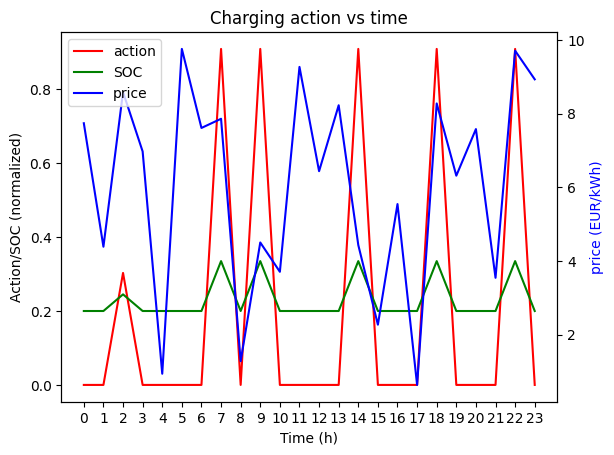

charging schedule=[0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 6.0, 0.0]
total bought energy in kwh=32.0


In [2]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from pulp import LpProblem, LpMinimize, LpVariable, LpInteger

# Instantiate parameters
rng = np.random.default_rng(seed=42) # Random number generator for price vector
price = rng.random(24,)*10 # Vector containing 24 price

# Instantiate constants
eta_c = 0.9
max_cap = 40
DeltaE = max_cap*(100-20)/100
P_max = 6.6

# Variables for the MILP problem
x = [LpVariable(f"x{i}", 0, P_max, LpInteger) for i in range(24)] # x is an integer variable with lower bound 0 and upper bound P_max

# Create the 'prob' variable to contain the problem data
prob = LpProblem("MILP Problem", LpMinimize)

# Objective function
prob += sum(price[i]*x[i] for i in range(24)), "Total Cost"

# Constraints - changed to inequality
prob += sum(x[i]*eta_c for i in range(24)) >= 0.9 * DeltaE, "constraint1_lower"
prob += sum(x[i]*eta_c for i in range(24)) <= 1.1 * DeltaE, "constraint1_upper"

# Solve the problem
prob.solve()

# Extract decision variables and save them
decision_var = [v.varValue for v in prob.variables()]
np.save('decision_var.npy', decision_var)

print("Decision variables saved to 'decision_var.npy'")

# Calculate state of charge
soc_list = [20 + decision_var[i]*eta_c*100/max_cap for i in range(24)]
soc_array = np.array(soc_list)


# Plotting
x = np.arange(len(decision_var))
y1 = [var/P_max for var in decision_var]
y2 = soc_array/100
y3 = price

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='r', label='action')
ax1.plot(x, y2, color='green', label='SOC')
ax1.set_title('Charging action vs time')
ax1.set_xticks(x)
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Action/SOC (normalized)', color='black')

ax2 = ax1.twinx()
ax2.plot(x, y3, color='b', label='price')
ax2.set_ylabel('price (EUR/kWh)', color='b')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

print(f"charging schedule={decision_var}")
print(f"total bought energy in kwh={sum(decision_var)}")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/michall/anaconda3/envs/smart_charging/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/8328afca8bc5403fa226312859b5364d-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/8328afca8bc5403fa226312859b5364d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 80 RHS
At line 83 BOUNDS
At line 108 ENDATA
Problem MODEL has 2 rows, 24 columns and 48 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 24 (0) columns and 48 (0) elements
0  Obj 0 Primal inf 28.8 (1)
1  Obj 53.734353
Optimal - objective value 53.734353
Optimal objective 53.73435347 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Decision variables saved to 'decision_var.npy'


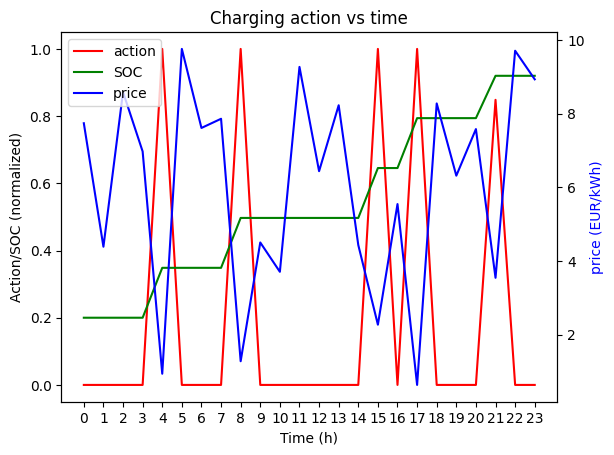

Charging schedule = [0.0, 0.0, 0.0, 0.0, 6.6, 0.0, 0.0, 0.0, 6.6, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.6, 0.0, 6.6, 0.0, 0.0, 0.0, 5.6, 0.0, 0.0]
Total bought energy in kWh = 32.0


In [7]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import pulp

# Instantiate parameters
rng = np.random.default_rng(seed=42)  # Random number generator for price vector
price = rng.random(24) * 10  # Vector containing 24 prices

# Constants
eta_c = 0.9
max_cap = 40
DeltaE = max_cap * (100 - 20) / 100
P_max = 6.6  # Maximum charging power

# Create the problem variable
problem = pulp.LpProblem("EV_Charging_Optimization", pulp.LpMinimize)

# Variables for the MILP problem
P_G2Vi_t = [pulp.LpVariable(f"P_G2Vi_t{i}", 0, P_max) for i in range(24)]

# Objective function
problem += pulp.lpSum(price[t] * P_G2Vi_t[t] for t in range(24)), "Total Charging Cost"

# Constraints
# Ensure the total energy charged is within a specific range
problem += pulp.lpSum(P_G2Vi_t[t] * eta_c for t in range(24)) >= 0.9 * DeltaE, "constraint1_lower"
problem += pulp.lpSum(P_G2Vi_t[t] * eta_c for t in range(24)) <= 1.1 * DeltaE, "constraint1_upper"

# Solve the problem
problem.solve()

# Extract decision variables
decision_var = [v.varValue for v in P_G2Vi_t]

# Save decision variables
np.save('decision_var.npy', decision_var)
print("Decision variables saved to 'decision_var.npy'")

# Calculate state of charge (SOC) assuming initial SOC of 20%
initial_soc = 20
soc_list = [initial_soc]
for t in range(24):
    soc_list.append(soc_list[-1] + decision_var[t] * eta_c * 100 / max_cap)
soc_array = np.array(soc_list[1:])

# Plotting
x = np.arange(24)
y1 = [var / P_max for var in decision_var]  # Total charging action normalized by P_max
y2 = soc_array / 100  # SOC normalized to 1
y3 = price

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='r', label='action')
ax1.plot(x, y2, color='green', label='SOC')
ax1.set_title('Charging action vs time')
ax1.set_xticks(x)
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Action/SOC (normalized)', color='black')

ax2 = ax1.twinx()
ax2.plot(x, y3, color='b', label='price')
ax2.set_ylabel('price (EUR/kWh)', color='b')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

print(f"Charging schedule = {decision_var}")
print(f"Total bought energy in kWh = {sum(decision_var)}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/michall/anaconda3/envs/smart_charging/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/5514ec845fa943469e2f171db38f3c8d-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/5514ec845fa943469e2f171db38f3c8d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 7 COLUMNS
At line 116 RHS
At line 119 BOUNDS
At line 156 ENDATA
Problem MODEL has 2 rows, 36 columns and 72 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (0) rows, 36 (0) columns and 72 (0) elements
0  Obj 0 Primal inf 28.8 (1)
1  Obj 22.74211
Optimal - objective value 22.74211
Optimal objective 22.74210963 - 1 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Decision variables saved to 'decision_var.npy'


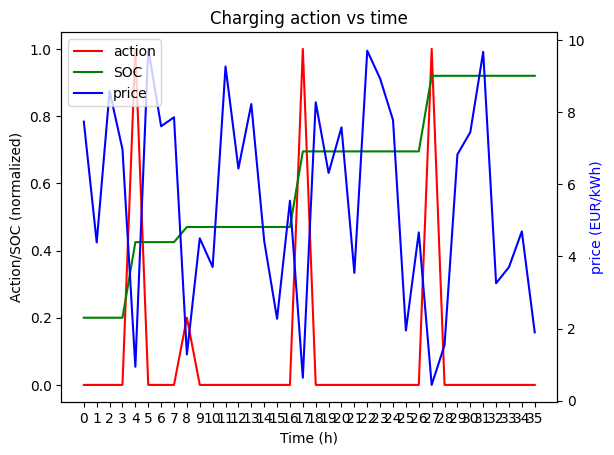

Charging schedule = [0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Total bought energy in kWh = 32.0


In [9]:
# Import necessary libraries
import numpy as np
from matplotlib import pyplot as plt
import pulp

# Constants from the paper
eta_ch = 0.9  # Charging efficiency
eta_dis = 0.9  # Discharging efficiency
P_max = 10  # Maximum power from PV system
N_BEVs = 4  # Number of BEVs
Delta_t = 1  # Time period duration in hours
amount = 36

# Instantiate parameters
rng = np.random.default_rng(seed=42)  # Random number generator for price vector
price = rng.random(amount) * 10  # Vector containing 24 prices

# Create the problem variable
problem = pulp.LpProblem("EV_Charging_Optimization", pulp.LpMinimize)

# Variables for the MILP problem
P_G2Vi_t = [pulp.LpVariable(f"P_G2Vi_t{i}", 0, P_max) for i in range(amount)]
P_PV2G_t = [pulp.LpVariable(f"P_PV2G_t{i}", 0, P_max) for i in range(amount)]

# Objective function
problem += pulp.lpSum(price[t] * P_G2Vi_t[t] for t in range(amount)), "Total Charging Cost"

# Constraints from the paper
# Ensure the total energy charged is within a specific range
problem += pulp.lpSum(P_G2Vi_t[t] * eta_ch for t in range(amount)) >= 0.9 * DeltaE, "constraint1_lower"
problem += pulp.lpSum(P_G2Vi_t[t] * eta_ch for t in range(amount)) <= 1.1 * DeltaE, "constraint1_upper"

# Additional constraints based on the paper's EMS design
# Add constraints related to PV power production, grid interaction, and BEV parameters

# Solve the problem
problem.solve()

# Extract decision variables
decision_var = [v.varValue for v in P_G2Vi_t]

# Save decision variables
np.save('decision_var.npy', decision_var)
print("Decision variables saved to 'decision_var.npy'")

# Calculate state of charge (SOC) assuming initial SOC of 20%
initial_soc = 20
soc_list = [initial_soc]
for t in range(amount):
    soc_list.append(soc_list[-1] + decision_var[t] * eta_ch * 100 / max_cap)
soc_array = np.array(soc_list[1:])

# Plotting
x = np.arange(amount)
y1 = [var / P_max for var in decision_var]  # Total charging action normalized by P_max
y2 = soc_array / 100  # SOC normalized to 1
y3 = price

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='r', label='action')
ax1.plot(x, y2, color='green', label='SOC')
ax1.set_title('Charging action vs time')
ax1.set_xticks(x)
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Action/SOC (normalized)', color='black')

ax2 = ax1.twinx()
ax2.plot(x, y3, color='b', label='price')
ax2.set_ylabel('price (EUR/kWh)', color='b')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

print(f"Charging schedule = {decision_var}")
print(f"Total bought energy in kWh = {sum(decision_var)}")
